In [55]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
import cufflinks as cf
import plotly.express as 

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

cf.go_offline()
%matplotlib inline

In [2]:
# read the dataset 
df = pd.read_csv('/Users/aneruthmohanasundaram/Documents/GitHub/Iris-Flower-Analysis/iris.csv')

# To check the head of the dataset upto first 10 elements 
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
# dropping the unwanted column from the dataset 
df.drop(['Id'],axis=1,inplace=True)

In [4]:
# To check the dataset after removing the unwanted column 
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
# Fetching the info of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Visualising the dataset 

In [10]:
# To check the column 
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

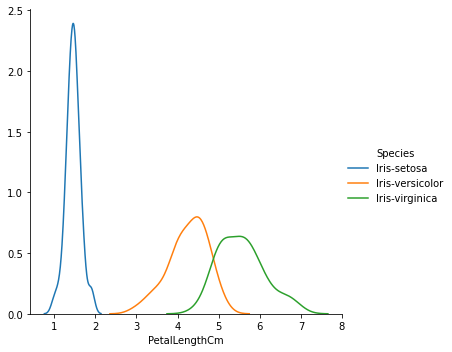

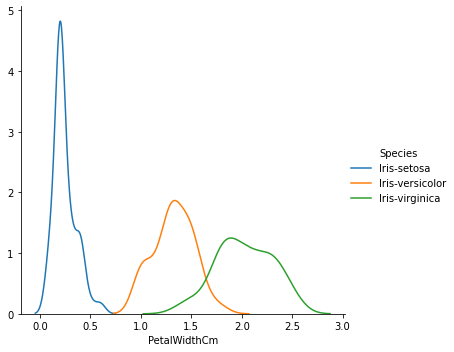

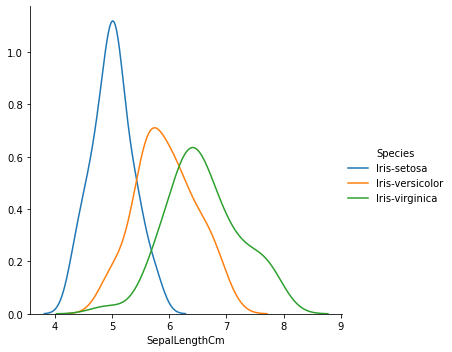

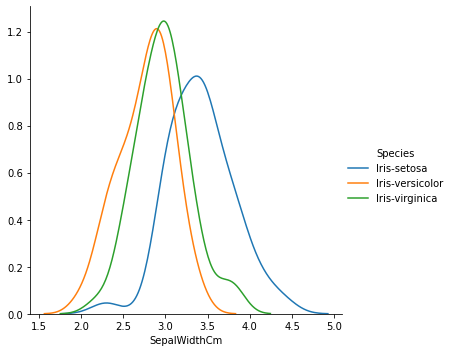

In [32]:
sns.FacetGrid(df,hue="Species",size=5).map(sns.kdeplot,"PetalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species",size=5).map(sns.kdeplot,"PetalWidthCm").add_legend()
sns.FacetGrid(df,hue="Species",size=5).map(sns.kdeplot,"SepalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species",size=5).map(sns.kdeplot,"SepalWidthCm").add_legend()
plt.show()

In [51]:
# To show the distribution for various features in plotly boxplot
df.iplot(kind='box')

In [60]:
# To show the distribution for various features in plotly violine
# PetalLengthCm vs Species
px.violin(df,y="PetalLengthCm",color='Species',points='all')